In [1]:
%run ../setup.ipynb
from fractions import Fraction

# Preliminaries

Before we get too far into digital signals, we'll need to establish some basic notation and concepts.
This section covers the following

- What is a signal?
- Mathematical notation
- Standard conventions

It does not cover mathematical fundamentals.  For the first few chapters, we will not need much math beyond basic algebra (variables and rules of arithmetic), and a bit of geometry.
Later on, we'll make use of more advanced concepts (complex numbers, polynomials, and exponentials), but those will be introduced as needed.

```{note}

I sometimes use the term *basic* in reference to certain ideas.  By this, I mean that these ideas are the *base level* upon which we will build.  This is **not** the same thing as being *easy*.  Many basic ideas can be complicated, and take quite some time to thoroughly understand.
```

If the mathematical concepts start to seem overwhelming at some point, don't worry!  Just take it slow, and don't move on to the next section too soon.  None of the contents here are magical: it all builds on basic ideas.

---
## What is a signal?

At a high level, a **signal** is a way of conveying information.
There unfortunately isn't a simple, concise, technical definition of *signal* that provides us with much insight.
The most intuitive example of a signal, at least for acoustically-minded folks, is the voltage on a wire connected to a microphone.
If you were to watch the voltage change over time, you might see something like the figure below:

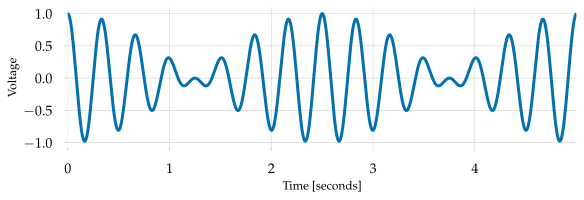

In [2]:
fs = 500
duration = 5
t = np.linspace(0, duration, num=duration * fs, endpoint=False)

x = np.cos(2 * np.pi * 3 * t) * np.cos(2 * np.pi * 0.2 * t)

fig, ax = plt.subplots(figsize=figaspect(1./3))
ax.plot(t, x)
ax.set(xlabel='Time [seconds]', ylabel='Voltage');
glue('fig_signal', fig, display=False);

```{glue:figure} fig_signal

An example signal, showing voltage changing over time.
```

The blue curve above represents the voltage measured at every time $t$, and we denote this curve (our signal) by the notation

$$
x(t).
$$

If we want to know the voltage at a specific time, say, 4 seconds, we would substitute that value for $t$ to get $x(4)$.  (In this case, $x(4) \approx 0.3$.)
Not all signals measure voltages, though at least recorded audio signals are typically constructed from electrical signals.
For audio processing, the important thing is that the signal can be converted somehow into changes in air-pressure that our ears can detect and interpret as sound.
Whether $x(t)$ is measuring volts, Pascals (the standard unit of air pressure), or something else, is usually not too important, as we are primarily concerned with the relative changes in the signal and not its absolute interpretation.
For that reason, we usually do not bother precisely annotating the units of whatever the signal is measuring.

To be a bit more precise, the signal $x(t)$ above is a *time-domain* signal.  There are other kinds of signals: for example, a gray-scale image can be thought of as a signal over two input coordinates (horizontal and vertical position), and the measurement is the brightness at that point.
Most of the techniques we develop in this book can be carried over to more general types of signals, but we will focus on the time-domain.

## Notation

The first bit of notation that we'll need is for signals.

- $x(t)$ denotes a **continuous-time** signal.  $t$ can be any real number: 0, 1, -53, $\pi$, etc.  We read this as "signal $x$ at time $t$."
- $x[n]$ denotes a **discrete-time** signal.  $n$ must be an integer: $0, 1, 2, -1, -2$, etc.  We read this as "the $n^\text{th}$ sample of signal $x$."

For this first chapter, we'll deal only with continuous signals $x(t)$.
Discrete signals will be introduced in the next chapter, but it's important to keep clear the distinction of notation: parentheses for continuous time, square brackets for discrete sample indices.
When the usage is clear from context, we may omit the time or sample index and refer to a signal just by its name $x$ -- this should be understood as referring to the entire signal.

Because we often use the letter "x" to refer to signals, we'll need a different symbol to represent multiplication.
We'll instead use the center dot $\cdot$ for this, e.g., $2\cdot 3 = 6$.
This creates a bit of a disconnect between multiplication in software (usually denoted by `*`) and in text, but this is for good reason: the $*$ operator will be used for a different purpose later on, known as *convolution*.
Using $\cdot$ instead of $*$ for multiplication will help avoid confusion due to notation issues.

Usually, we'll let $x(t)$ represent an arbitrary signal.  If we need to refer to a specific signal, it will be defined explicitly by a mathematical formula, such as this example

$$
x(t) = \sin(2\pi \cdot t)
$$

would define a pure tone oscillating at 1 cycle per second.

Most of what we do in signal processing amounts to modifying a signal in some way, for example, applying a low-pass filter to remove high-frequency content.
We can think of this as applying some **function** $g$ to an **input signal** $x$ and producing an **output signal** $y$, which we write as

$$
y = g(x).
$$



## Standard conventions

We'll often use $x(t)$ and $y(t)$ to generally refer to input and output signals, respectively.

To keep things simple, time will always be referred to by the letter $t$, and it will always be measured in units of seconds.
As stated above, time should be understood to be continuously valued.
Time will be measured starting from 0.

Discrete (i.e., integer-valued) quantities will be referred to by the letters $n$, $m$, or $k$.
These also will be measured starting from 0.
This means that a sequence of length $N$ has indices $0, 1, 2, ..., N-1$.
If you're not used to this, it can seem a bit awkward at first, but trust me: this convention will make the math much easier later on!

Unless otherwise stated, we will by default assume that signals are 0-valued when $t$ (for continuous-time) or $n$ (for discrete-time) are negative:

```{math}
:label: negative_time

\begin{split}
t < 0 &\Rightarrow x(t) = 0\\
n < 0 &\Rightarrow x[n] = 0.
\end{split}
```

You can think of this as pretending that signals are silent until you start recording.

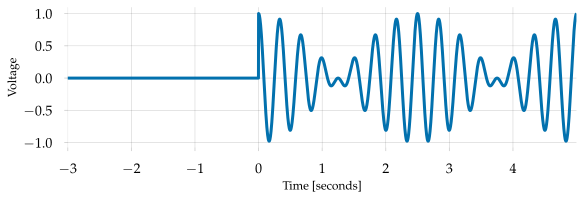

In [3]:
fs = 500
start = -3
end = 5

t = np.linspace(start, end, num=(end - start) * fs, endpoint=False)

x = np.cos(2 * np.pi * 3 * t) * np.cos(2 * np.pi * 0.2 * t)
x[t<0] =  0

fig, ax = plt.subplots(figsize=figaspect(1./3))
ax.plot(t, x)
ax.set(xlabel='Time [seconds]', ylabel='Voltage');
glue('fig_negtime', fig, display=False)

```{glue:figure} fig_negtime

An example signal showing that voltage $x(t) = 0$ for all $t < 0$ (negative time).
```

Angles will be denoted by the Greek letters $\theta$ (*theta*) or $\phi$ (*phi*), and measured in units of *radians*, **not degrees!**
There are $2\pi$ radians in a full rotation ($360^\circ$); $\pi$ radians in a half rotation ($180^\circ$), and $\pi/2$ radians in a right angle ($90^\circ$).

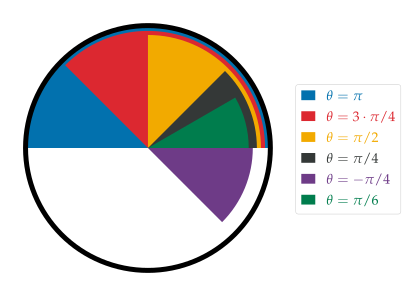

In [4]:
# Plot a circle, inscribed right triangle, angle, and sine and cosine markers
fig, ax = plt.subplots(figsize=figaspect(0.5))

circ = patches.Ellipse((0, 0), 2, 2, facecolor='none', edgecolor='k', linewidth=5, zorder=20)
ax.add_patch(circ)

for col, frac in enumerate([Fraction(1), Fraction(3,4), Fraction(1,2), Fraction(1, 4), Fraction(-1, 4), Fraction(1, 6)], 1):
    theta = np.pi * float(frac)
    if frac.denominator == 1:
        string = r'\pi'
    elif frac.numerator == 1:
        string = r'\pi/{}'.format(frac.denominator)
    elif frac.numerator == -1:
        string = r'-\pi/{}'.format(frac.denominator)
    else:
        string = r'{}\cdot\pi/{}'.format(frac.numerator, frac.denominator)
    
    if theta < 0:
        t1 = theta
        t2 = 0
    else:
        t1 = 0
        t2 = theta
        
    w = patches.Wedge((0, 0),  1 - 0.01 - (col - 1) / 30, theta1=t1 * 180/np.pi, theta2=t2 * 180 / np.pi,
                        facecolor=colors[col-1], zorder=10 + col, label=r'$\theta={}$'.format(string))
    ax.add_patch(w)
    
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 0.750), labelcolor='linecolor')
ax.set(xticks=[], yticks=[], xlim=[-1.15, 1.15], ylim=[-1.15, 1.15])
ax.set_aspect('equal');
glue('radians', fig, display=False)

```{glue:figure} radians

Illustrations of angles measured in radians, denoted by $\theta$.
```

We'll use the letter $\mathrm{j}$ to refer to the *imaginary unit*, i.e., $\mathrm{j} = \sqrt{-1}$.
Mathematicians traditionally use $i$ for this, but $\mathrm{j}$ is more commonly used in electrical engineering because $i$ is reserved for electrical current.
Fortunately for us, the Python programming language also uses `1j` to denote the imaginary unit, so translating from text to code should be fairly straightforward.

Complex numbers --- numbers with both a real and imaginary component --- will be denoted generally by the letter $z$ (or occasionally $w$).
This is primarily for consistency with other mathematical traditions.
In general, $x$ and $y$ can assumed to be real-valued, and $z$ can be assumed to be complex-valued unless otherwise stated.

Finally, we will occasionally see snippets of code that implement the abstract concepts being described in the text.
This code will be written in the Python programming language, and will be typeset as follows:
```python
for n in range(len(x)):
    y[n] = 2*x[n]  # Hurray! Now x is twice as big!
```
More specifically, I will assume Python 3.6 or later, and will make use of the `NumPy` package for numerical computation.
If you're new to Python, I recommend getting started with the [Anaconda](https://www.anaconda.com/distribution/) distribution.